In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/WalmartSales/Walmart.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace('[^0-9a-zA-Z]+', '_', regex=True)
)

In [ ]:
#trim whitespace in string columns after standardizing
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

In [ ]:
#Parse date and add new time columns
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['dayofweek'] = df['transaction_date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'] >= 5

In [ ]:
#Convert obvious Boolean columns
bool_cols = ['promotion_applied', 'holiday_indicator', 'stockout_indicator']
for c in bool_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.lower().map(
            {'true': True, 'false': False, '1': True, '0': False}
        )


In [ ]:
#Convert numeric columns
num_cols = [
    'quantity_sold', 'unit_price', 'inventory_level', 'reorder_point',
    'reorder_quantity', 'supplier_lead_time', 'customer_age',
    'customer_income', 'forecasted_demand', 'actual_demand'
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [ ]:
# Drop rows missing key info
df.dropna(subset=['transaction_id', 'product_id', 'customer_id',
                  'quantity_sold', 'unit_price', 'transaction_date'],
          inplace=True)

In [ ]:
#Fill missing numeric values with median
for c in num_cols:
    if c in df.columns:
        df[c].fillna(df[c].median(), inplace=True)

/tmp/ipython-input-400607960.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)


In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Feature engineering
df['cost_of_goods'] = df['quantity_sold'] * df['unit_price']

In [ ]:
df.drop(['transaction_id', 'supplier_id', 'customer_id'], axis=1, inplace=True)

In [ ]:
df.columns


Index(['product_id', 'product_name', 'category', 'quantity_sold', 'unit_price',
       'transaction_date', 'store_id', 'store_location', 'inventory_level',
       'reorder_quantity', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'year', 'month', 'day', 'dayofweek', 'is_weekend',
       'cost_of_goods'],
      dtype='object')

In [ ]:
df.drop(columns=(['day', 'weekday']), inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/WalmartSales/Walmart_Sales_Data.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WalmartSales/Walmart_Sales_Data.csv')

In [ ]:
df.head()

,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,inventory_level,reorder_quantity,...,promotion_applied,promotion_type,weather_conditions,holiday_indicator,stockout_indicator,year,month,dayofweek,is_weekend,cost_of_goods
0,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",246,170,...,True,NaN,Stormy,False,True,2024,3,6,True,565.38
1,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",43,212,...,True,Percentage Discount,Rainy,False,True,2024,7,6,True,7648.16
2,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",411,252,...,False,NaN,Sunny,False,True,2024,6,0,False,5511.00
3,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",452,112,...,True,Percentage Discount,Sunny,True,False,2024,8,3,False,911.55
4,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",412,177,...,False,NaN,Sunny,False,True,2024,9,4,False,1497.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              5000 non-null   int64  
 1   product_name            5000 non-null   object 
 2   category                5000 non-null   object 
 3   quantity_sold           5000 non-null   int64  
 4   unit_price              5000 non-null   float64
 5   transaction_date        5000 non-null   object 
 6   store_id                5000 non-null   int64  
 7   store_location          5000 non-null   object 
 8   inventory_level         5000 non-null   int64  
 9   reorder_quantity        5000 non-null   int64  
 10  supplier_lead_time      5000 non-null   int64  
 11  customer_age            5000 non-null   int64  
 12  customer_gender         5000 non-null   object 
 13  customer_income         5000 non-null   float64
 14  customer_loyalty_level  5000 non-null   

In [ ]:
missing = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
print("\n Missing Value Percentage (Top 10):\n")
print(missing.head(10))


 Missing Value Percentage (Top 10):

promotion_type      68.14
product_id           0.00
category             0.00
quantity_sold        0.00
unit_price           0.00
transaction_date     0.00
store_id             0.00
store_location       0.00
inventory_level      0.00
product_name         0.00
dtype: float64


In [ ]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
product_id,5000.0,551.233400,258.826606,100.00,322.0000,559.000,776.0000,999.00
quantity_sold,5000.0,2.982800,1.419474,1.00,2.0000,3.000,4.0000,5.00
unit_price,5000.0,1023.467294,559.614242,50.10,537.7750,1029.175,1506.3075,1999.85
store_id,5000.0,10.525000,5.786888,1.00,5.0000,11.000,16.0000,20.00
inventory_level,5000.0,253.121800,142.885456,0.00,130.0000,253.000,377.2500,500.00
reorder_quantity,5000.0,200.517000,58.257381,100.00,150.7500,200.500,251.0000,300.00
supplier_lead_time,5000.0,5.523000,2.863549,1.00,3.0000,6.000,8.0000,10.00
customer_age,5000.0,44.124000,15.329358,18.00,31.0000,44.000,58.0000,70.00
customer_income,5000.0,70041.627846,29053.371736,20005.34,44865.4175,70188.290,95395.8725,119999.78
year,5000.0,2024.000000,0.000000,2024.00,2024.0000,2024.000,2024.0000,2024.00


Univariate EDA (individual features): To understand distributions, skewness, and outliers.

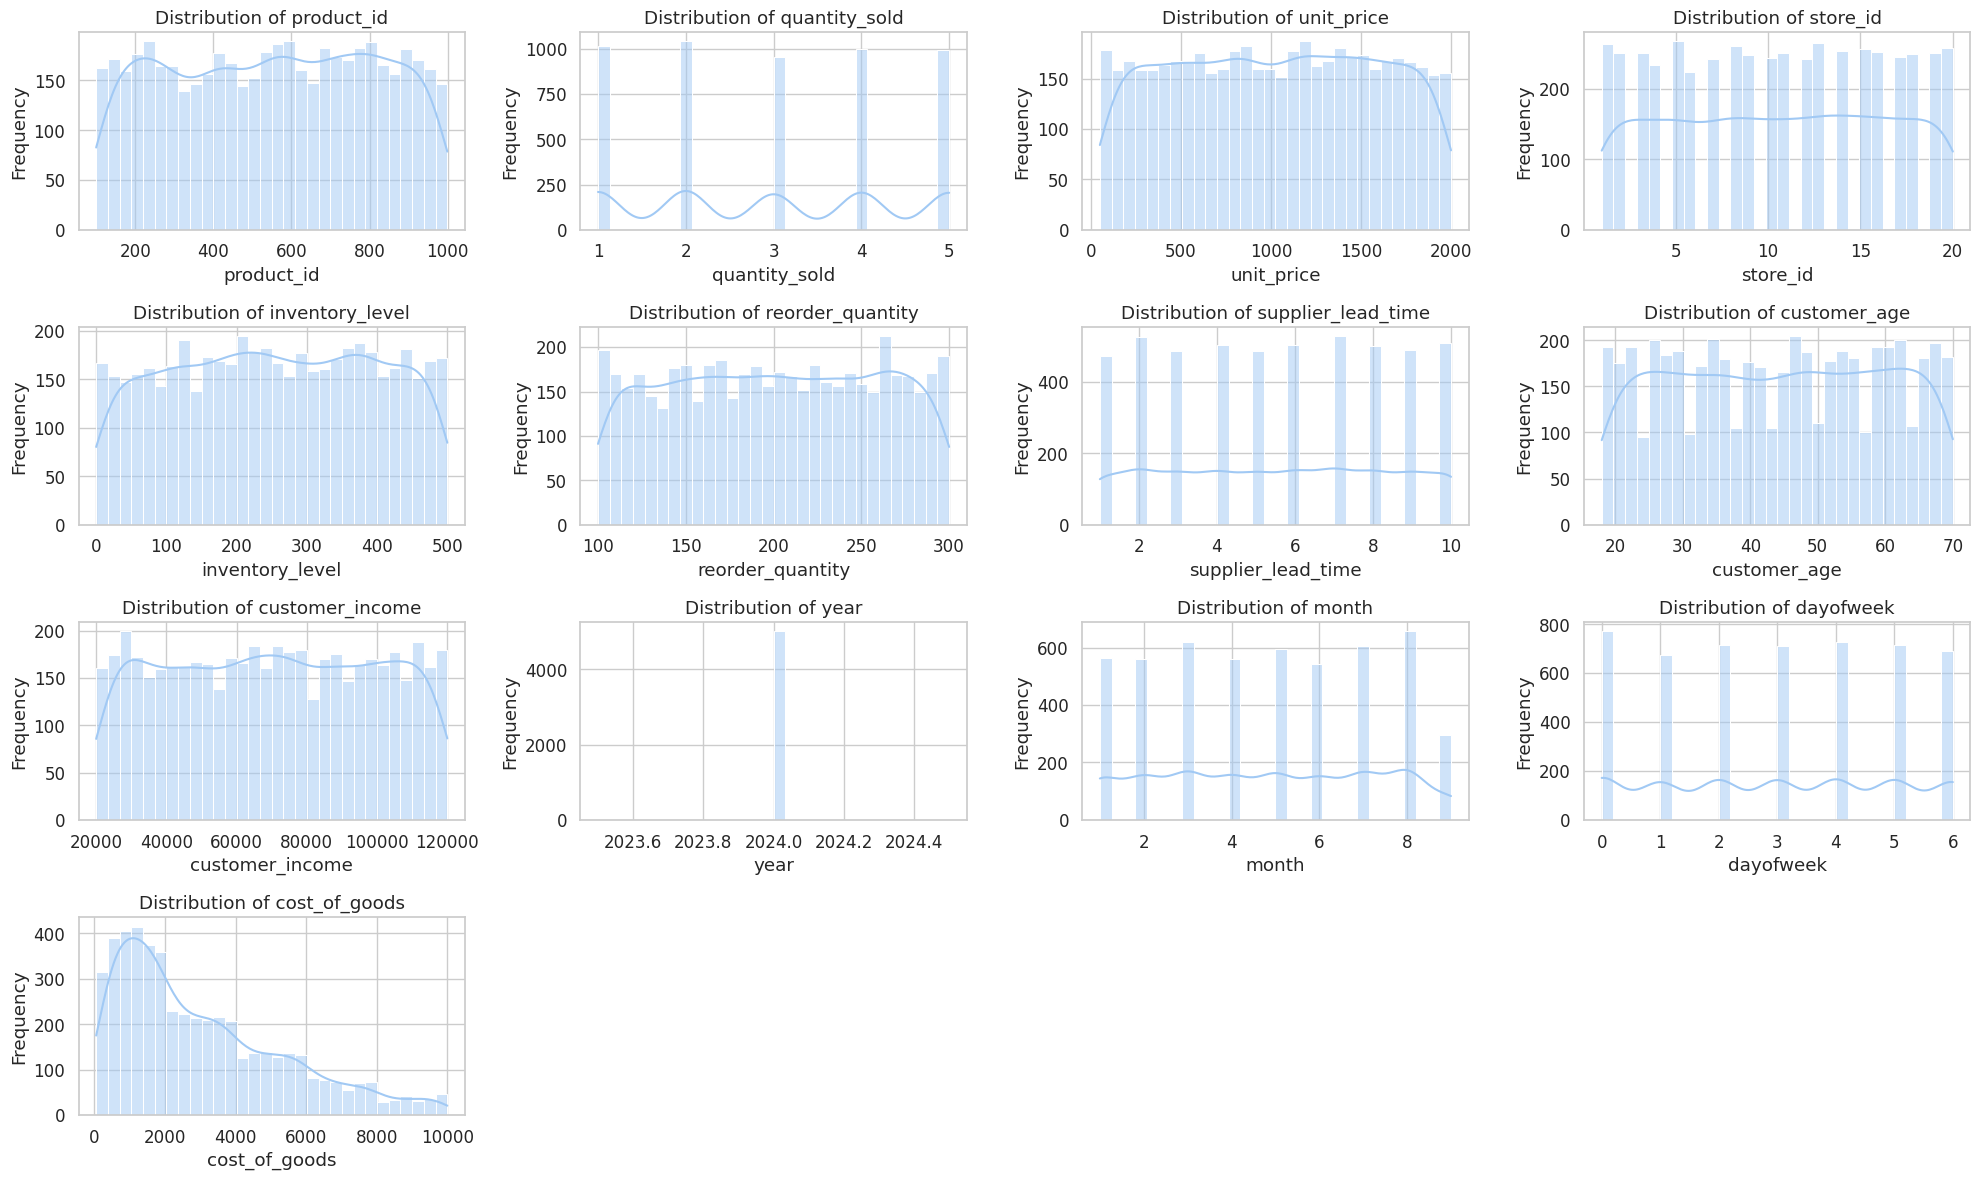

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
n = len(num_cols)

cols = 4  # number of columns
rows = (n + cols - 1) // cols  # number of rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3), squeeze=False)

for i, col in enumerate(num_cols):
    r = i // cols
    c = i % cols
    sns.histplot(df[col], bins=30, kde=True, ax=axes[r, c])
    axes[r, c].set_title(f'Distribution of {col}')
    axes[r, c].set_xlabel(col)
    axes[r, c].set_ylabel('Frequency')

# Remove empty subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()


Categorical variables: To see the balance of categories like gender, loyalty level, store location, etc.

/tmp/ipython-input-242299760.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-242299760.py:22: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/tmp/ipython-input-242299760.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-242299760.py:22: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(
/tmp/ipython-input-242299760.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for 

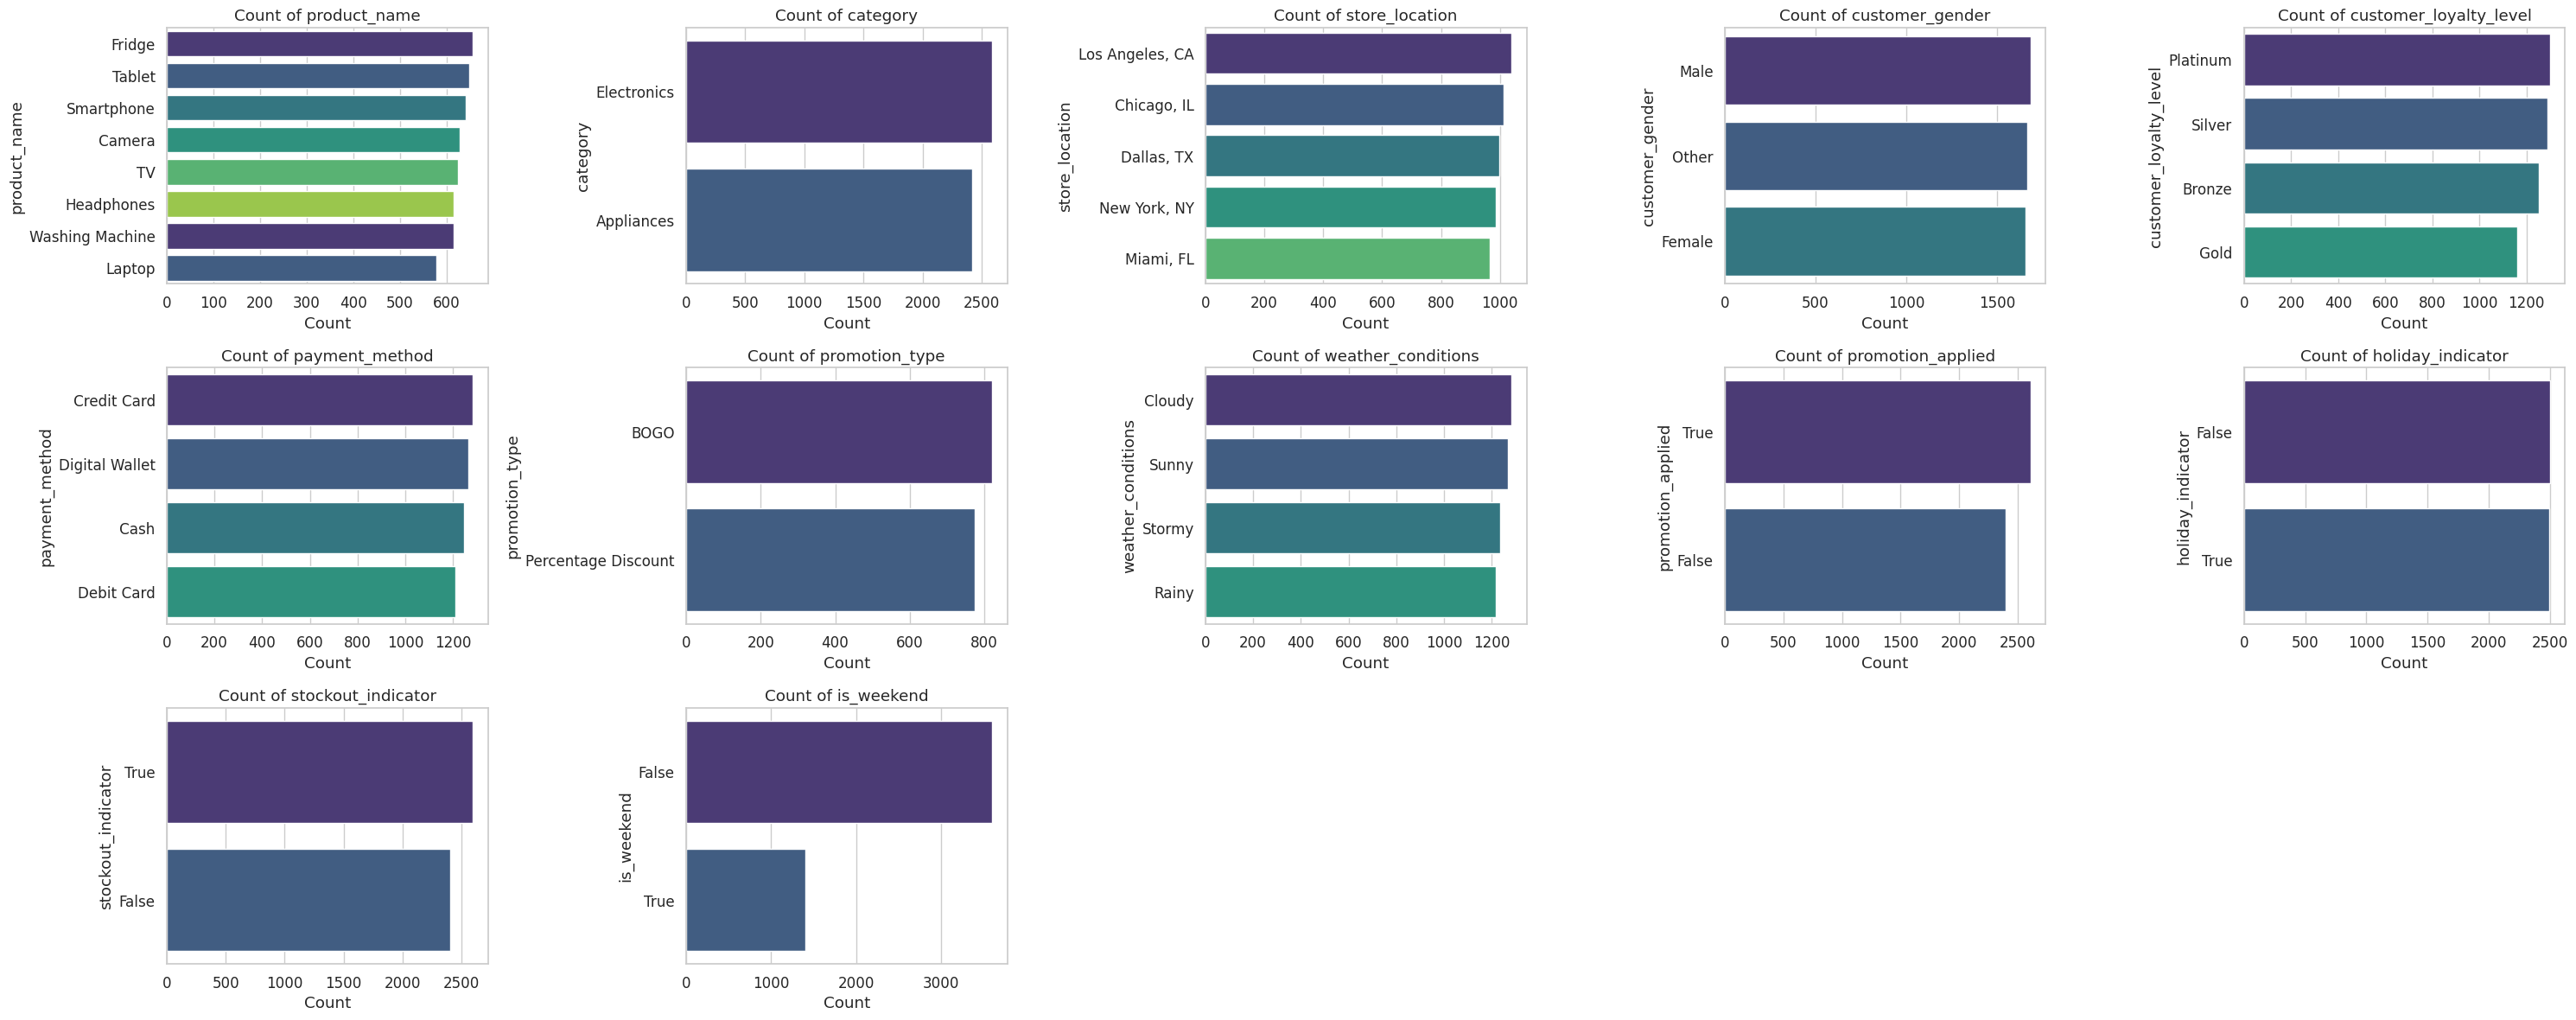

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical columns (object + bool)
cat_cols = df.select_dtypes(include='object').columns.tolist() + df.select_dtypes(include='bool').columns.tolist()
if 'transaction_date' in cat_cols:
    cat_cols.remove('transaction_date')


n = len(cat_cols)
cols = 5  # number of columns in grid
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4), squeeze=False)


palette = sns.color_palette("viridis")

for i, col in enumerate(cat_cols):
    r = i // cols
    c = i % cols
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index,
        palette=palette,
        ax=axes[r, c]
    )
    axes[r, c].set_title(f'Count of {col}')
    axes[r, c].set_xlabel('Count')
    axes[r, c].set_ylabel(col)

# Removing empty subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

Bivariate EDA

In [ ]:
# palletes to visualize graphs
sns.set_theme(style="whitegrid", rc={
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.labelweight": "bold",
    "figure.dpi": 120
})

def _color_list(palette_name: str, n: int):

    pal = sns.color_palette(palette_name, n)
    return pal

def _annotate_bars(ax, fmt="{:,.0f}", va="bottom", rotate=False):

    for p in ax.patches:
        h = p.get_height()
        if np.isnan(h):
            continue
        ax.annotate(fmt.format(h),
                    (p.get_x() + p.get_width()/2, h),
                    ha="center", va=va, fontsize=9, rotation=90 if rotate else 0,
                    xytext=(0, 3), textcoords="offset points")

def _bar_from_series(s: pd.Series, title: str, xlabel: str, ylabel: str, palette="crest", rotate_xticks=45, fmt="{:,.0f}"):

    vals = s.values
    idx = s.index.astype(str)
    colors = _color_list(palette, len(s))

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(idx, vals, color=colors, edgecolor="none")
    ax.set_title(title, weight="bold")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_axisbelow(True)
    _annotate_bars(ax, fmt=fmt, rotate=(len(s) > 15))
    plt.xticks(rotation=rotate_xticks, ha="right")
    plt.tight_layout()
    plt.show()

def _topn(series_or_df, n=12):
    """Helper: return top-N by value for Series or 'sum' of a numeric column in a DataFrame groupby."""
    return series_or_df.head(n)


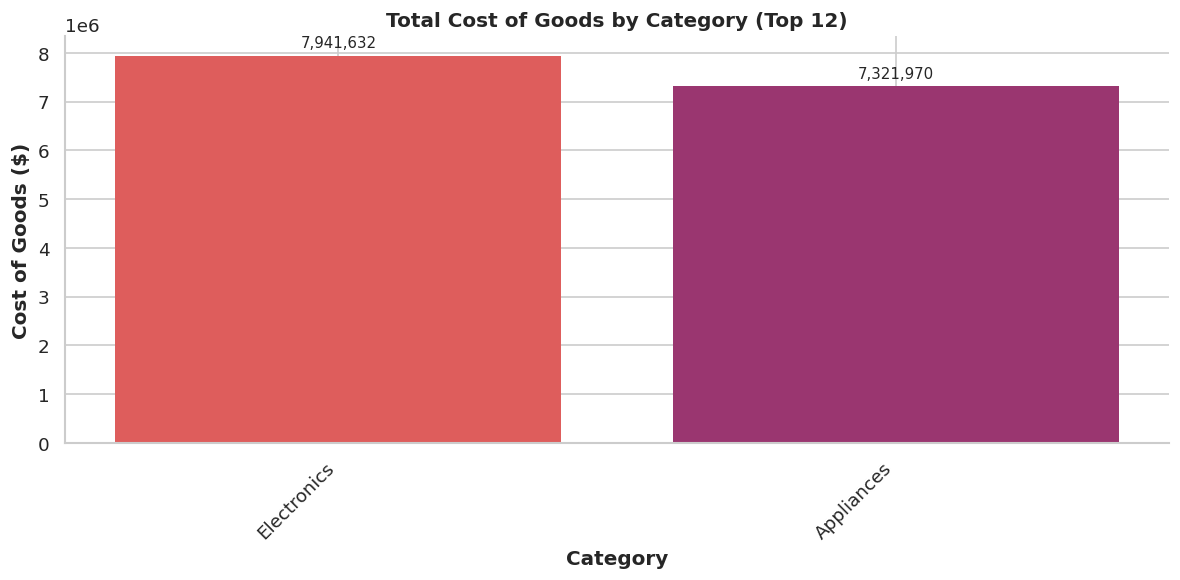

In [ ]:
sales_by_cat = (df.groupby('category')['cost_of_goods']
                  .sum()
                  .sort_values(ascending=False))
_bar_from_series(_topn(sales_by_cat, 12),
                 title="Total Cost of Goods by Category (Top 12)",
                 xlabel="Category", ylabel="Cost of Goods ($)",
                 palette="flare")


**Cost of Goods by Category**

1. Electronics leads with $7,941,632 cogs.

2. Appliances follows with $7,321,970 cogs.


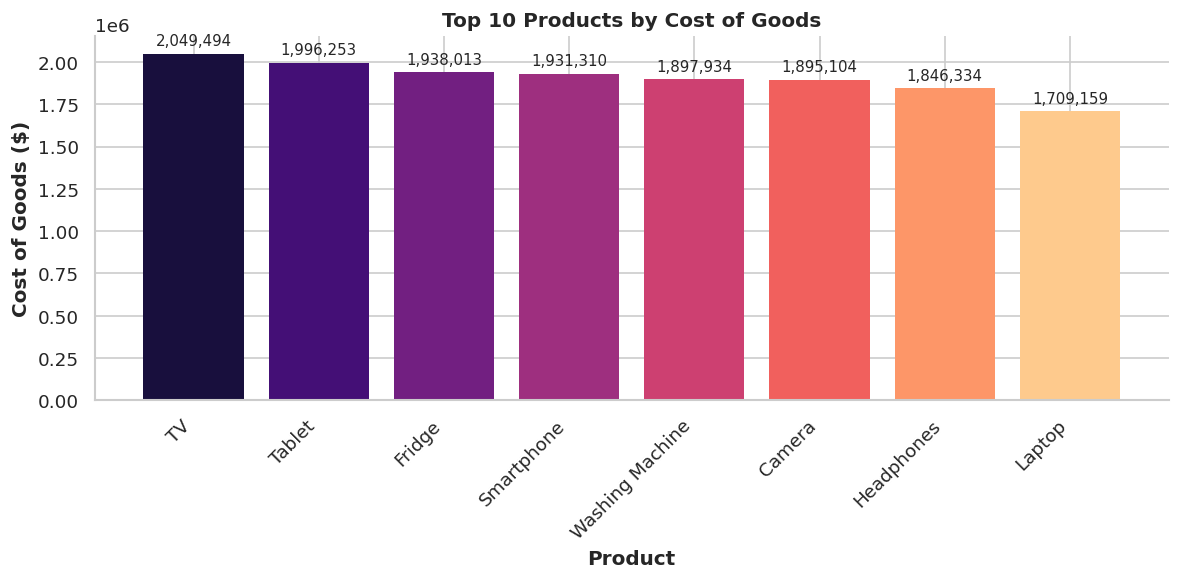

In [ ]:
top_products = (df.groupby('product_name')['cost_of_goods']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

_bar_from_series(top_products,
                 title="Top 10 Products by Cost of Goods",
                 xlabel="Product", ylabel="Cost of Goods ($)",
                 palette="magma")


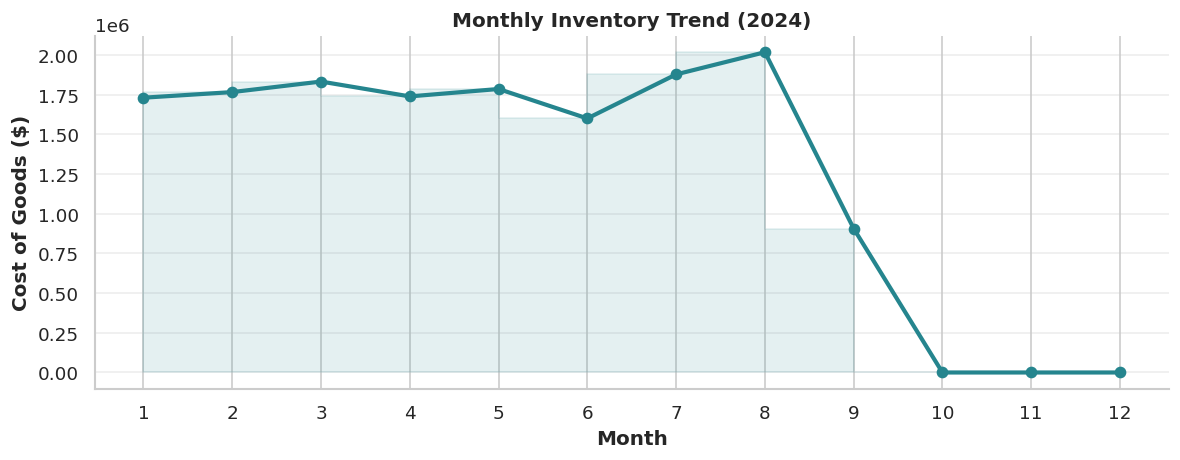

In [ ]:
monthly = (df.groupby('month')['cost_of_goods']
             .sum()
             .reindex(range(1,13), fill_value=0))

color = _color_list("viridis", 10)[4]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(monthly.index, monthly.values, marker="o", linewidth=2.5, color=color)
ax.fill_between(monthly.index, monthly.values, step="pre", alpha=0.12, color=color)
ax.set_title("Monthly Inventory Trend (2024)", weight="bold")
ax.set_xlabel("Month")
ax.set_ylabel("Cost of Goods ($)")
ax.set_xticks(range(1,13))
ax.grid(True, axis="y", alpha=0.35)
plt.tight_layout()
plt.show()


**Peak COGS $**: The highest purchases occurred in August (Month 8), with 2,000,000.

**Lowest COGS $**: September(Month 9) had the lowest purchases,justabove 900,000.

**Overall Trend**: There is an increasing trend in purchases from the beginning of the year, peaking in August, and then a sharp decline in September. This could indicate seasonality or other external factors influencing purchases.

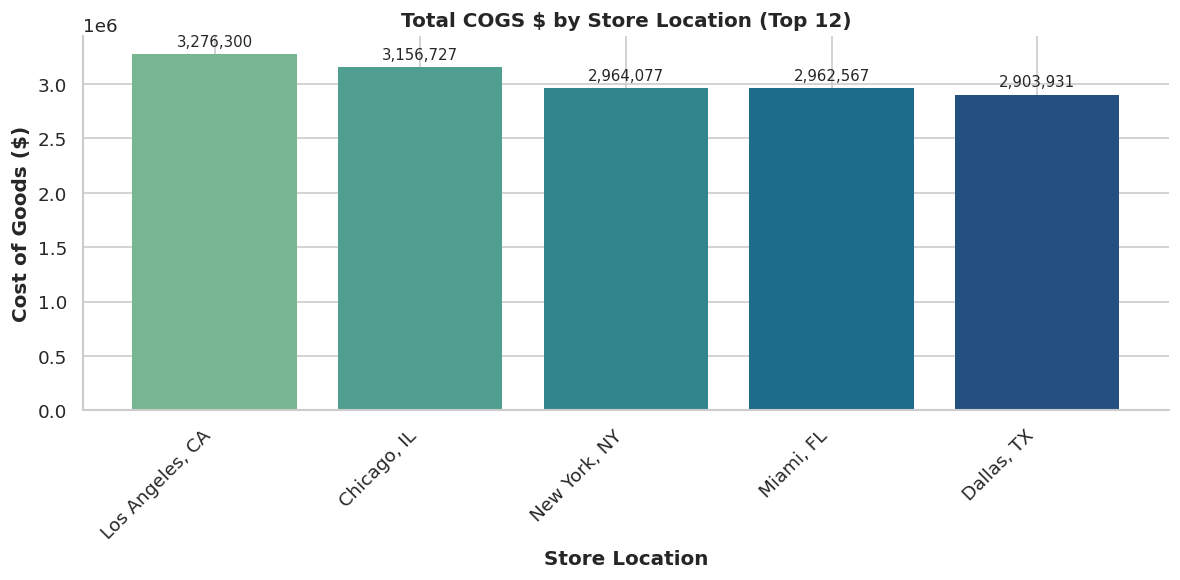

In [ ]:
sales_by_store = (df.groupby('store_location')['cost_of_goods']
                    .sum()
                    .sort_values(ascending=False))
_bar_from_series(_topn(sales_by_store, 12),
                 title="Total COGS $ by Store Location (Top 12)",
                 xlabel="Store Location", ylabel="Cost of Goods ($)",
                 palette="crest")


Based on the "Total COG's by Store Location (Top 12)" graph:

*   **Top Performing Store:** Los Angeles, CA has the highest total purchases, significantly outperforming other locations.
*   **Second Highest :** Dallas, TX is the second highest performing store location.
*   **Purchase Distribution:** There is a noticeable variation in purchase performance across different store locations, with some stores contributing much more to the total purchase than others.
*   **Potential for Analysis:** Further analysis could investigate factors contributing to the success of the top-performing stores and identify areas for improvement in lower-performing locations.

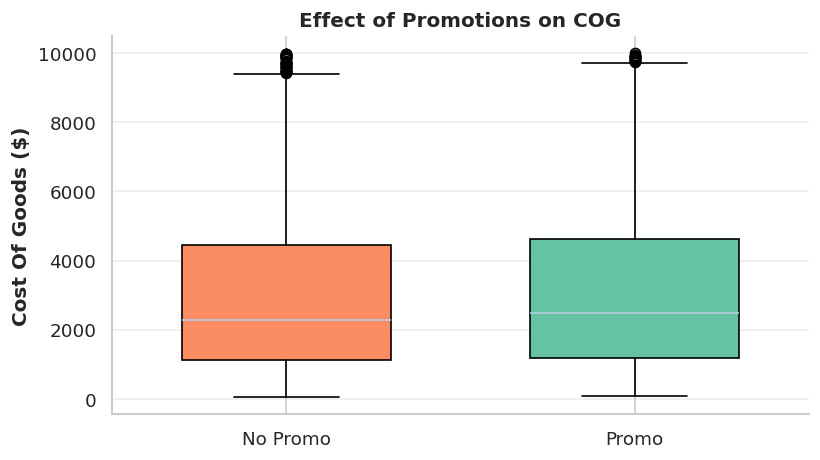

In [ ]:

promo_color, no_promo_color = _color_list("Set2", 2)

fig, ax = plt.subplots(figsize=(7, 4))
d_no = df[df['promotion_applied'] == False]['cost_of_goods']
d_yes = df[df['promotion_applied'] == True]['cost_of_goods']

bp1 = ax.boxplot(d_no.dropna(), positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor=no_promo_color))
bp2 = ax.boxplot(d_yes.dropna(), positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor=promo_color))

ax.set_xticks([0,1])
ax.set_xticklabels(['No Promo', 'Promo'])
ax.set_title("Effect of Promotions on COG", weight="bold")
ax.set_ylabel("Cost Of Goods ($)")
ax.grid(True, axis="y", alpha=0.35)
plt.tight_layout()
plt.show()


Based on the "Effect of Promotions on COG" box plot:

*   **Higher Median Purchases with Promotions:** The median cost of goods appears to be higher when a promotion is applied compared to when there is no promotion.



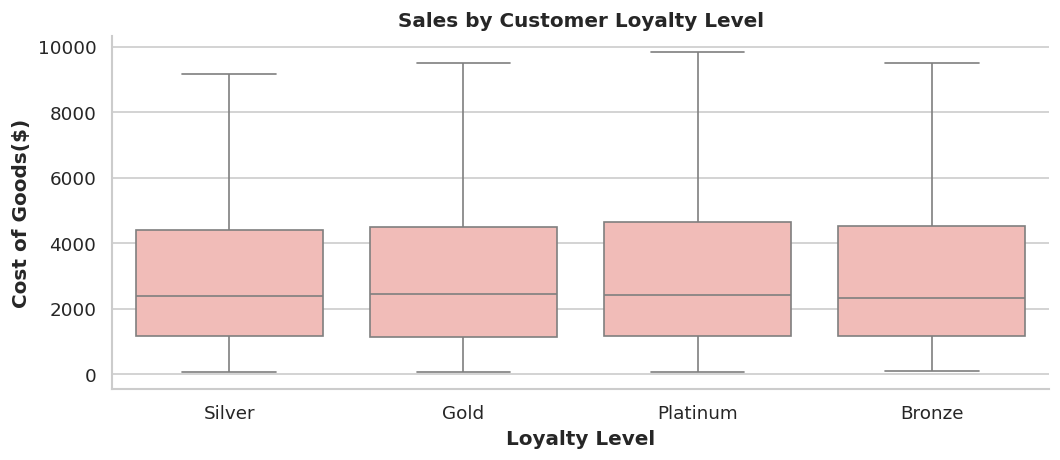

In [ ]:

sns.set_palette("Pastel1")
fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(x='customer_loyalty_level', y='cost_of_goods', data=df, ax=ax, showfliers=False)
ax.set_title("Sales by Customer Loyalty Level", weight="bold")
ax.set_xlabel("Loyalty Level")
ax.set_ylabel("Cost of Goods($)")
plt.tight_layout()
plt.show()


**"Purchases by Customer Loyalty Level" box plot:**

*   **Similar Median Purchases Across Loyalty Levels:** The median transaction amount appears to be relatively similar across all customer loyalty levels (Bronze, Silver, Gold, Platinum).
*   **Variability in Purchases:** There seems to be some variation in the spread of transaction amounts within each loyalty level, but no single level stands out as having consistently much higher or lower transaction amounts than others based solely on the median.


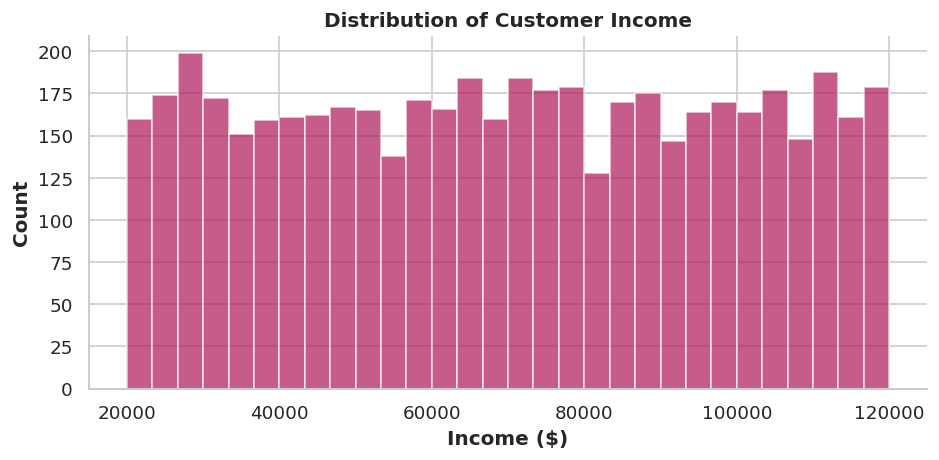

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
c = _color_list("rocket", 6)[2]
ax.hist(df['customer_income'].dropna(), bins=30, alpha=0.7, color=c, edgecolor="white")
ax.set_title("Distribution of Customer Income", weight="bold")
ax.set_xlabel("Income ($)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


**"Distribution of Customer Income" histogram:**

*   **Distribution Shape:** The distribution of customer income appears to be somewhat skewed to the right, meaning there are more customers in the lower income brackets and fewer customers in the higher income brackets.
*   **Income Range:** Customer incomes range from approximately $20,000 to $120,000.
*   **Most Frequent Income Range:** The highest frequency of customers falls within the income range of roughly $60,000 to $80,000.

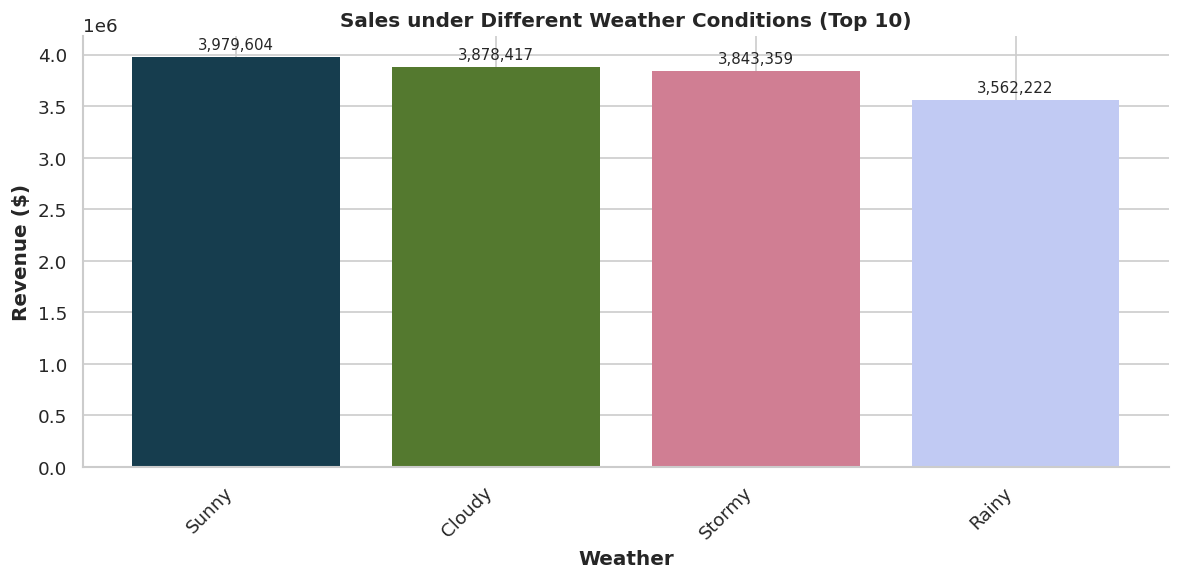

In [ ]:
weather_sales = (df.groupby('weather_conditions')['cost_of_goods']
                   .sum()
                   .sort_values(ascending=False))
_bar_from_series(_topn(weather_sales, 10),
                 title="Sales under Different Weather Conditions (Top 10)",
                 xlabel="Weather", ylabel="Revenue ($)",
                 palette="cubehelix")


**Sales under Different Weather Conditions (Top 10) graph:**

*   **Sunny Weather Leads in Sales:** Sunny weather conditions correspond to the highest total sales among the listed weather types.
*   **Varied Impact of Other Conditions:** Other weather conditions like Rainy, Cloudy, and Snow have varying levels of impact on sales, with Rainy conditions showing the second highest sales.


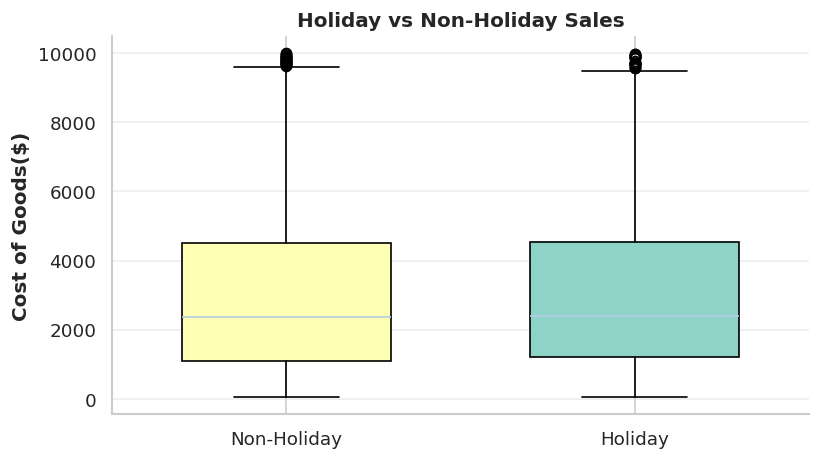

In [ ]:
hol_color, nonhol_color = _color_list("Set3", 2)
fig, ax = plt.subplots(figsize=(7, 4))

d_non = df[df['holiday_indicator'] == False]['cost_of_goods']
d_hol = df[df['holiday_indicator'] == True]['cost_of_goods']

ax.boxplot(d_non.dropna(), positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor=nonhol_color))
ax.boxplot(d_hol.dropna(), positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor=hol_color))

ax.set_xticks([0,1])
ax.set_xticklabels(['Non-Holiday', 'Holiday'])
ax.set_title("Holiday vs Non-Holiday Sales", weight="bold")
ax.set_ylabel("Cost of Goods($)")
ax.grid(True, axis="y", alpha=0.35)
plt.tight_layout()
plt.show()


**"Holiday vs Non-Holiday Sales" box plot:**

**Medians are similar**: The median cost of goods (the line within the box) appears almost identical, around $2,500, for both Holiday and Non-Holiday sales.

**Holiday sales show less spread (IQR):** The interquartile range (IQR) (the length of the box) is slightly smaller for Holiday sales, indicating the middle 50% of sales values are more tightly clustered than for Non-Holiday sales.

**Maximum and outlier sales are comparable:** Both categories have similar maximum sales values near $10,000, with similar-looking outliers extending just past the maximum for each group.

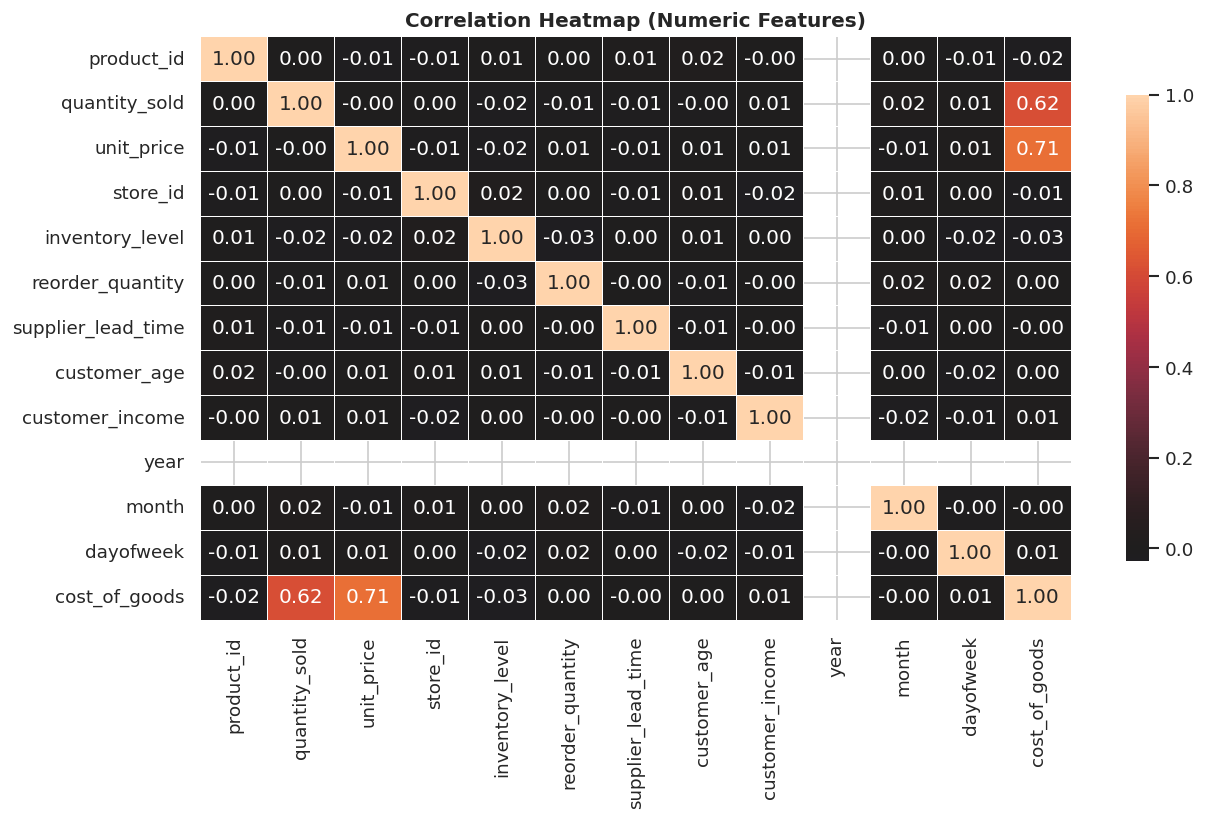

In [ ]:
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corr, annot=True, cmap="icefire", center=0, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title("Correlation Heatmap (Numeric Features)", weight="bold")
plt.tight_layout()
plt.show()


**"Correlation Heatmap (Numeric Features)":**

*   **Strong Positive Correlation:** There is a strong positive correlation between `quantity_sold` and `cost_of_goods`, which is expected as `cost_of_goods` is calculated using `quantity_sold` and `unit_price`.
*   **Moderate Positive Correlation:** There appears to be a moderate positive correlation between `customer_income` and `cost_of_goods`, suggesting that customers with higher incomes tend to spend more per transaction.
*   **Weak or No Correlation:** Most other numeric features show weak or no significant correlation with `cost_of_goods`, indicating that these factors might not have a strong linear relationship with the transaction amount.
*   **Interrelationships between other features:** The heatmap also shows correlations between other numeric features, such as a moderate negative correlation between `inventory_level` and `stockout_indicator`.

In [ ]:
print("Top Categories by Cost of Goods:")
print((df.groupby('category')['cost_of_goods'].sum()
        .sort_values(ascending=False).head()).to_frame('Revenue ($)').applymap(lambda x: f"${x:,.0f}"))

print("\nStore with Highest Purchases:")
best_store = (df.groupby('store_location')['cost_of_goods'].sum()
                .sort_values(ascending=False).idxmax())
print(best_store)

print("\nAverage Income by Loyalty Level:")
print((df.groupby('customer_loyalty_level')['cost_of_goods'].mean())
       .round(0).apply(lambda x: f"${x:,.0f}"))


Top Categories by Cost of Goods:
            Revenue ($)
category               
Electronics  $7,941,632
Appliances   $7,321,970

Store with Highest Purchases:
Los Angeles, CA

Average Income by Loyalty Level:
customer_loyalty_level
Bronze      $3,029
Gold        $3,049
Platinum    $3,089
Silver      $3,042
Name: cost_of_goods, dtype: object


/tmp/ipython-input-921016904.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .sort_values(ascending=False).head()).to_frame('Revenue ($)').applymap(lambda x: f"${x:,.0f}"))


In [ ]:
df.to_csv('/content/drive/MyDrive/WalmartSales/Walmart_Sales_EDA.csv', index=False)
